In [1]:
#Imports
import numpy as np
import pandas as pd
import joblib as jb
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.cluster import KMeans
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix
from sklearn.decomposition import PCA

**QUESTIONS 1, 2 & 3**

Following the example's instructions we have loaded the wine dataset and prepared the data for unsupervised learning. We have focused only on the data and ignored the targets.

In [2]:
#Load wine dataset and define vairables
wine = datasets.load_wine()
X=wine.data
Y=wine.target
df=pd.DataFrame(X,columns=wine.feature_names)
df.head()

#changing name of troublesome comlumn
df = df.rename(columns={'od280/od315_of_diluted_wines': 'ratio_of_diluted_wines'})

**QUESTION 4 - Part 1**

Without assuming previous knowledge of the data, we would first test to see how many samples there are in the dataset in order to make an approximated estimation of how many clusters there should be. To begin with, we'll take a look at the data.

In [3]:
df.describe()


,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,ratio_of_diluted_wines,proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


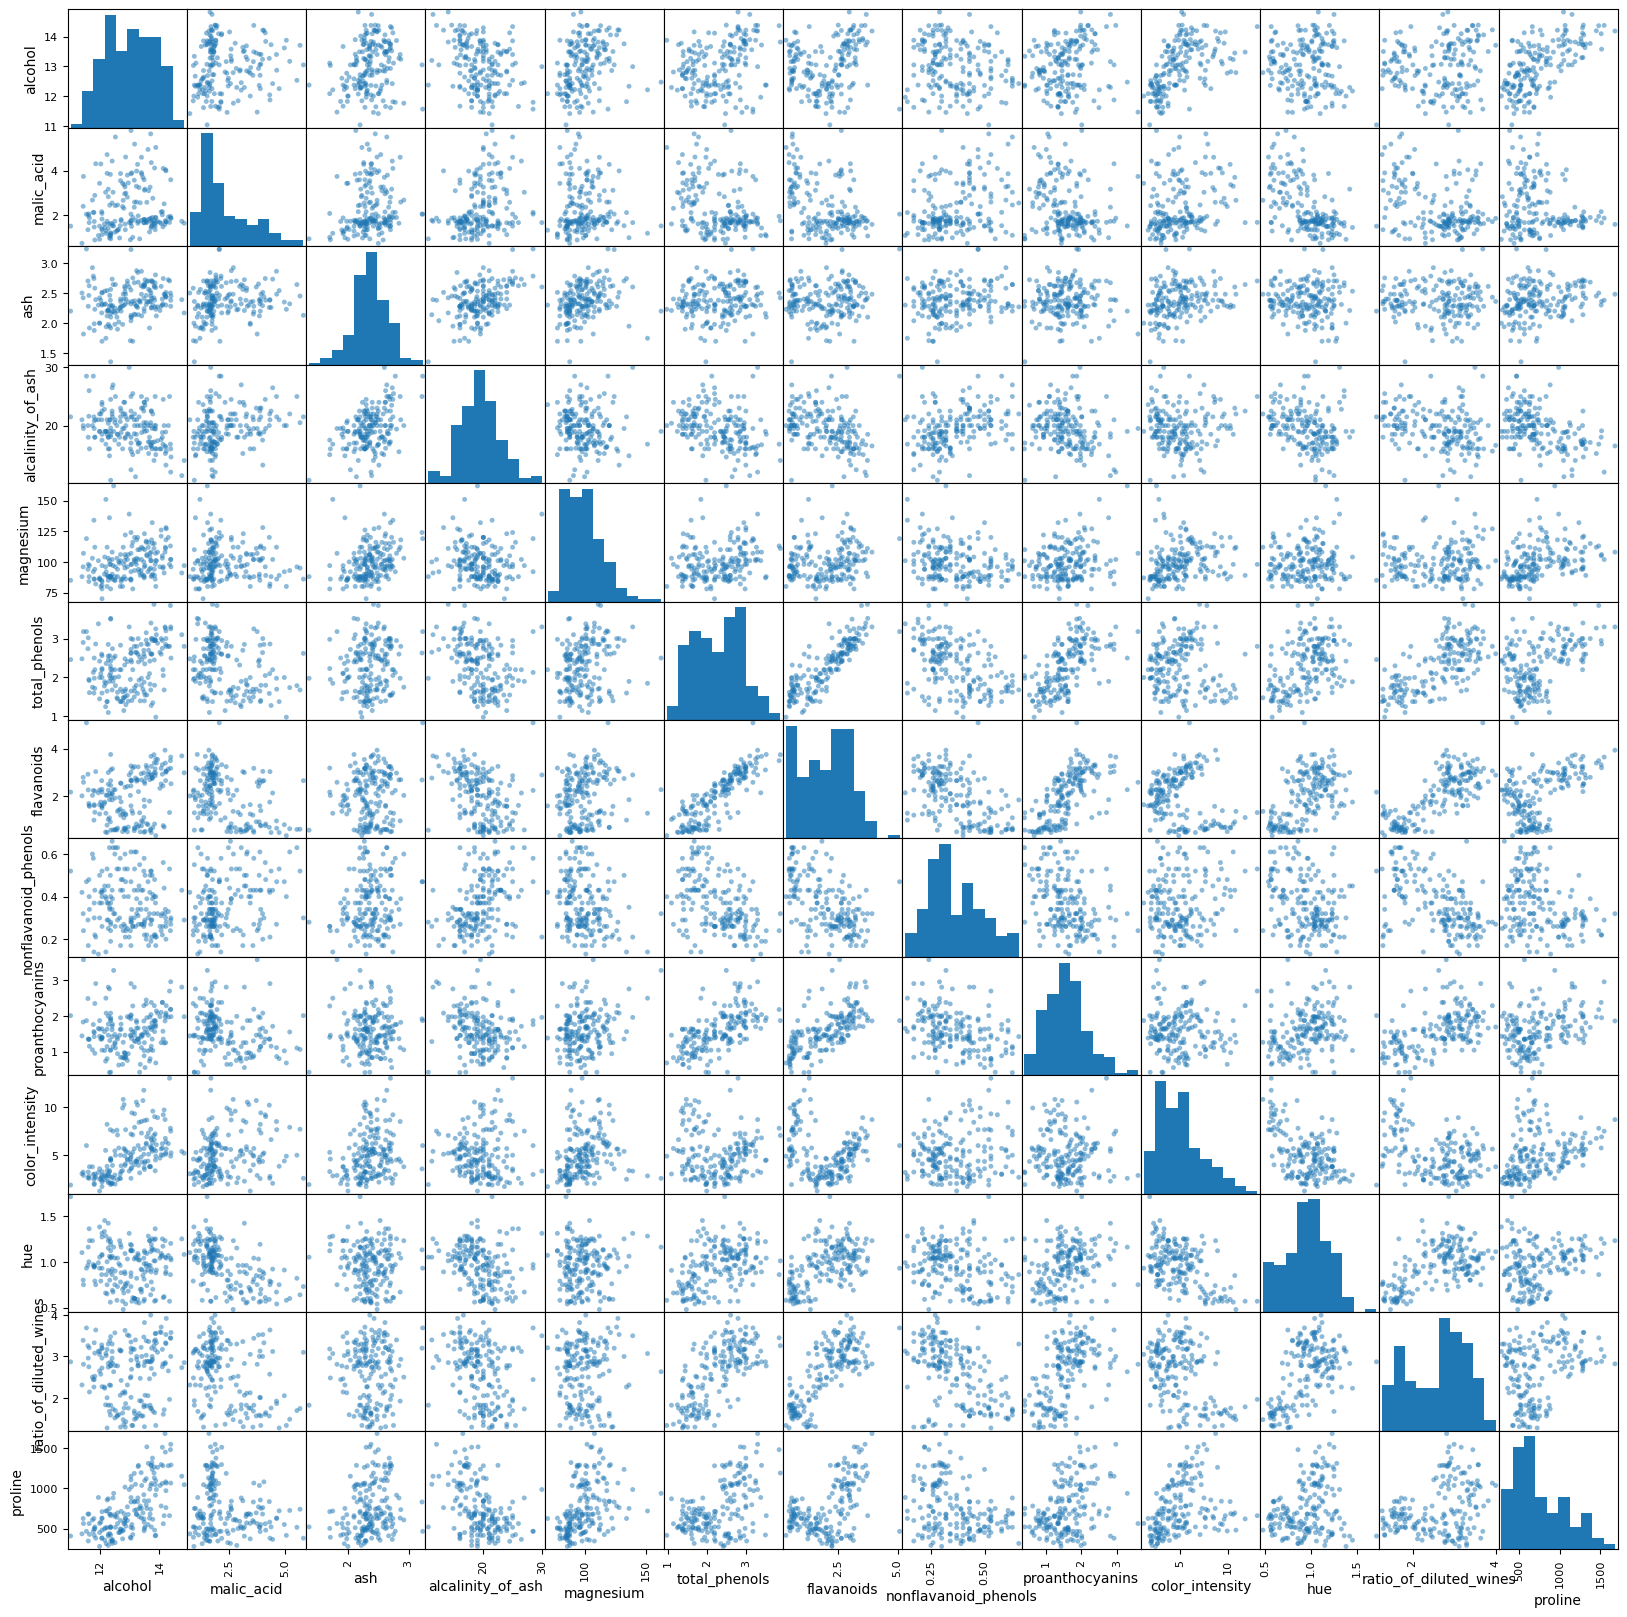

In [4]:
visual = pd.plotting.scatter_matrix(df, figsize = [20,20], s = 50)


**QUESTION 4 - Part 2**

Having seen both the table of values, we can see that there are 178 samples and that their values vary greatly in scale, which suggests that in order to do the clustering we will need to normalize the values. Their scatter matrix aslo suggests that there are some correlations between the different types of data but no correlation at all between some others. Keeping all of this in mind, I would suggest testing for 3 or 4 clusters in the data, in that waym there would be enough data in each cluster so that they wouldn't be uderfitted but not too much as to be overfitted and have to may data points to reach precise predictions

**QUESTION 5**

As mentioned before, the data in the table of values suggests a strong variance in the range of some variables, which will affect the clustering because MSE and RMSE punish valuses that are far from the norm.  

The important features will most likely be:
- **Alcohol:**  Alcohol values do not vary greatly but they are useful to separate stronger wines from milder wines.
- **Malic acid:**  The values for malic acid vary inside a very big range and the presence of malic acid will derermine the sourness of wine so it will probably prove useful for separating the wines in different sourness levels.
- **Total phenols:**  The std value is very high, suggesting a great variance in the values and making it potentially one of the greatest discriminatiors in the data set for clustering separation.
- **Proanthocyanins:**  Given the range of this feature, it can be a good separating factor when combined with a stronger discriminating feature.
- **Color intensity:**  The color intensity has values that vary greatly and is used to determine the wine type (white, rosee, dark...). Therefore, it is one of the strongest features for clustering along with the total phenols feature.
- **Hue:**  Given its wide range (although not variation) and the fact that the hue is used to determine the wine age and oxidation, it can be a strong feature for the clustering discrimination.
- **Ratio of diluted wines:**  This is a strong marker related to the wine composition and, given the correlates shown in the visual between the ratio and the quality of the wine, it will be very helpful to recognize the different clusters.
- **Proline:**  The range of this feature is extremely high so, without scaling, the feautre could dominate distance metrics which makes it one of the strongest clustering features.

The rest of the features do not show such wide ranges in their values or are not so strongly correlated between each other so, while they could help determine whether a sample belongs to a cluster or another, they would always do it after a stron feature has already discarded all the other clusters. 
    

**Elbow method to identify a suitable number of clusters**

C:\Users\carlo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\carlo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\carlo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\carlo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Window

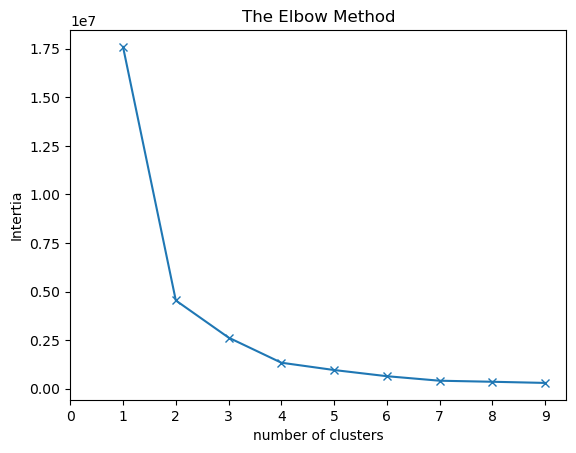

In [5]:
intertia = []
K = range(1,10)
for k in K:
    model = KMeans(n_clusters=k)
    model = model.fit(X)
    intertia.append(model.inertia_)
plt.plot(K, intertia, marker= "x")
plt.xlabel('number of clusters')
plt.xticks(np.arange(10))
plt.ylabel('Intertia')
plt.title('The Elbow Method')
plt.show()

**QUESTION 6**

Above is the scatterplot of the elbow method of the original dataset. There is a substantial drop in inertia when moving from one to two clusters, with smaller improvements when dropping further to three and four. Beyond that point, the curve flattens, indicating minimal additional improvement. Three clusters seems to be a reasonable amount based on the elbow method.

**Normalize the dataset**

In [6]:
normalized_X = preprocessing.normalize(X)
df_norm = pd.DataFrame(normalized_X, columns=df.columns)
df_norm.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,ratio_of_diluted_wines,proline
0,0.013264,0.001594,0.002265,0.014542,0.118383,0.002610,0.002852,0.000261,0.002135,0.005257,0.000969,0.003654,0.992738
1,0.012513,0.001687,0.002029,0.010617,0.094794,0.002512,0.002616,0.000246,0.001213,0.004152,0.000995,0.003223,0.995336
2,0.011063,0.001984,0.002245,0.015636,0.084906,0.002354,0.002724,0.000252,0.002362,0.004775,0.000866,0.002665,0.996176
3,0.009680,0.001314,0.001684,0.011317,0.076119,0.002593,0.002351,0.000162,0.001468,0.005254,0.000579,0.002324,0.996961
4,0.017775,0.003477,0.003853,0.028193,0.158418,0.003759,0.003611,0.000524,0.002443,0.005800,0.001396,0.003934,0.986753


**QUESTION 7 and 8**

Above is the normalization of wine dataset with relabeling so the features are labeled correctly.

Normalization is preprocessing technique that rescales each data point so that its vector length becomes 1. It preserves the relative proportions of the features within each sample but removes differences in magnitude(size). This helps make sure no data point dominates just because it has larger values.

For k means, this can matter because the algorithm relies on distances. If some points have much larger values than others, k-means will be biased toward those points. Normalization reduces this effect and can potentially lead to more balances clusters. 

C:\Users\carlo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


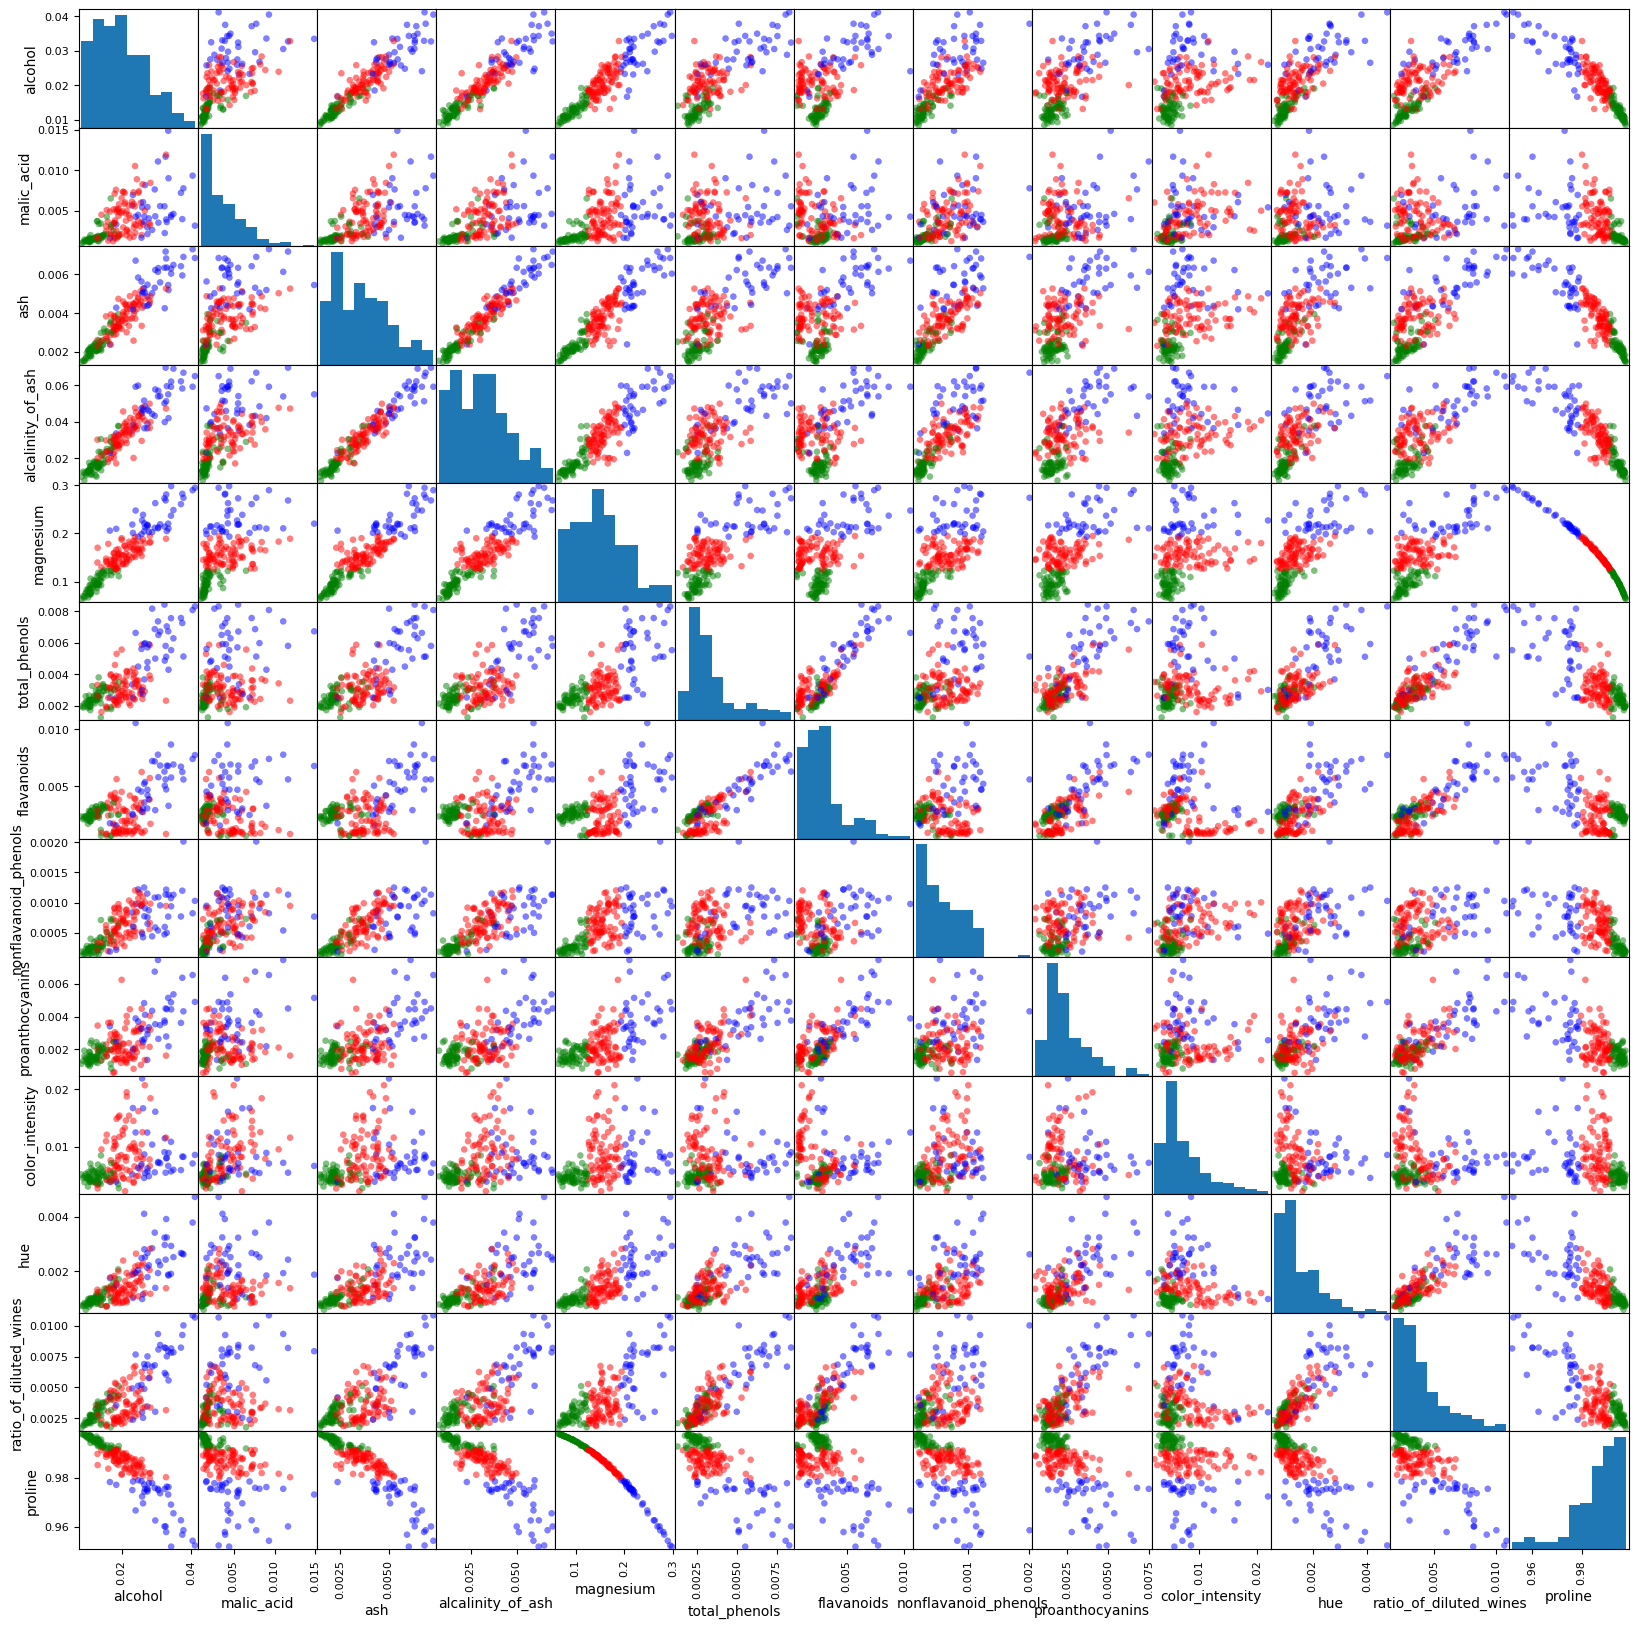

In [7]:
model = KMeans(n_clusters=3)
model.fit(normalized_X)
colormap = np.array(['red', 'green', 'blue'])
visual = pd.plotting.scatter_matrix(
    df_norm, 
    figsize = [20,20], 
    c = colormap[model.labels_], 
    s = 90
)

**QUESTION 9** 

The scatter-matrix above clearly shows that the points form three visually distinct groups across mulitple feature combinations. Each color (red, green, blue) forms dense clusters that are mostly seprated from the others, suggesting that three clusters is a reasonable amount for this wine dataset.

In [8]:
df_norm.describe()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,ratio_of_diluted_wines,proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,0.019950,0.003711,0.003644,0.031124,0.151541,0.003444,0.002973,0.000581,0.002396,0.007342,0.001477,0.003993,0.986018
std,0.007321,0.002499,0.001409,0.014671,0.054081,0.001543,0.001802,0.000327,0.001249,0.003843,0.000736,0.001979,0.010073
min,0.008428,0.000944,0.001473,0.007739,0.064147,0.001255,0.000637,0.000145,0.000554,0.002241,0.000579,0.001675,0.951812
25%,0.013548,0.001684,0.002359,0.017615,0.109775,0.002385,0.001746,0.000277,0.001515,0.004612,0.000970,0.002535,0.981687
50%,0.018984,0.003174,0.003468,0.030036,0.146777,0.002946,0.002721,0.000514,0.002030,0.005981,0.001232,0.003384,0.988441
75%,0.024783,0.004981,0.004506,0.040010,0.183082,0.003886,0.003551,0.000833,0.003040,0.008853,0.001834,0.004870,0.993564
max,0.041106,0.014852,0.007305,0.069703,0.297958,0.008404,0.010560,0.002008,0.007469,0.021876,0.004727,0.010858,0.997835


**QUESTION 10**

Features with higher standard variation (std) after normalization vary more between samples, this means that they can influence the k-means algorithm more. In contrast, features with very small std vary very little and will have less effect because k-means calculates distances in multi-dimensional space. 

From the results produced by `df_norm.describe()`, we can see that after normalization, features like alcohol, magnesium, alcalinity of ash and proline have relatively higher spread and are likely to influence clustering more. In contrast, features like nonflavanoid phenols, hue and ash have very low variation and will likely contribute to less. Given k-means relies on distances, so features with mor evariation influence cluster formation more strongly.

C:\Users\carlo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\carlo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\carlo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\carlo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Window

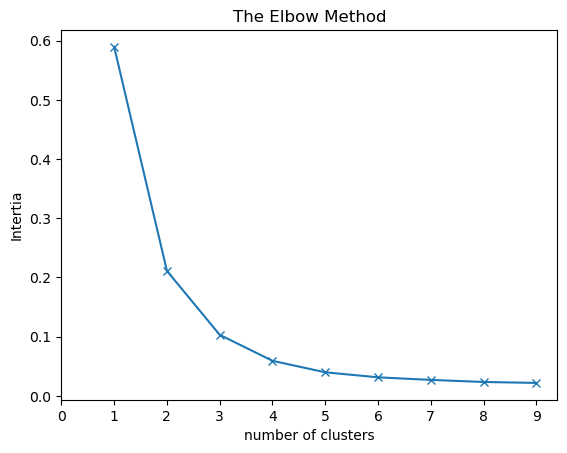

In [9]:
intertia = []
K = range(1,10)
for k in K:
    model = KMeans(n_clusters=k)
    model = model.fit(normalized_X)
    intertia.append(model.inertia_)
plt.plot(K, intertia, marker= "x")
plt.xlabel('number of clusters')
plt.xticks(np.arange(10))
plt.ylabel('Intertia')
plt.title('The Elbow Method')
plt.show()

**QUESTION 11**

The scatterplot produced by the elbow method after normalization (the scatterplot above) seems almost identical to the one before normalizing the dataset (the original dataset). The elbow is still clearly visible at k=3, suggesting that three clusters is a reasonable amount. There is a slight improvement at k=5, but after that the curve gradually flattens indicating minimal additional improvements from the increasing the number of clusters. This means normalization did not change the distances much from the wine dataset, and the reasonable amount of clusters still remains to be around 3.

**QUESTION 12**

Based on both the original and normalized wine datasets, we would settle for 3 clusters. In both cases, the elbow method shows a sharp decrease in inertia to k=3, after k=3 the inertia curve flattens indicating adding more clusters provides minimal additional benefits. Normalization does not change this pattern significantly (almost identical to the original but with a slight improvement at k=5), so that means three clusters remain the most reasonable choice for representing the natural groupings in the wine dataset.

In [10]:
model_3 = KMeans(n_clusters = 3) 
model_3.fit(X)
print('model_3 inertia:', model_3.inertia_)

model_3 inertia: 2633555.332409339


C:\Users\carlo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [11]:
model_3N = KMeans(n_clusters = 3) 
model_3N.fit(normalized_X) 
print('model_3N inertia:', model_3N.inertia_)

model_3N inertia: 0.10307915278019417


C:\Users\carlo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


**QUESTION 13**
Above is two cluster models: model_3 and model_3N, with 3 clusters each and based on the original and the normalized dataset rsepectively.

Confusion Matrix – Original Data:
[[ 1 31 27]
 [64  7  0]
 [37 11  0]]
Confusion Matrix – Normalized Data:
[[51  8  0]
 [ 6 32 33]
 [ 4 40  4]]


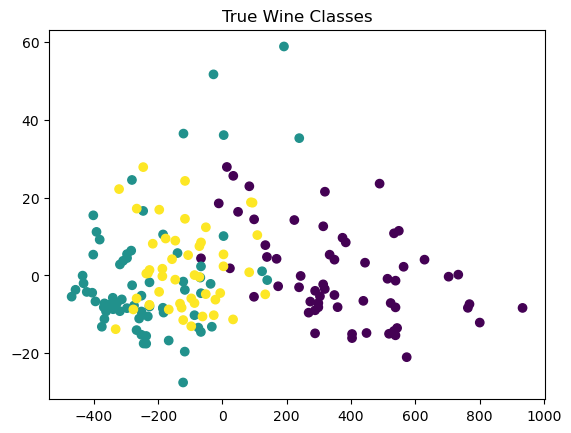

In [15]:
#Comparasion of models with condussion matrixes
labels_original = model_3.labels_
cm_original = confusion_matrix(Y, labels_original)
print("Confusion Matrix – Original Data:")
print(cm_original)

labels_norm=model_3N.labels_
cm_norm=confusion_matrix(Y, labels_norm)
print("Confusion Matrix – Normalized Data:")
print(cm_norm)


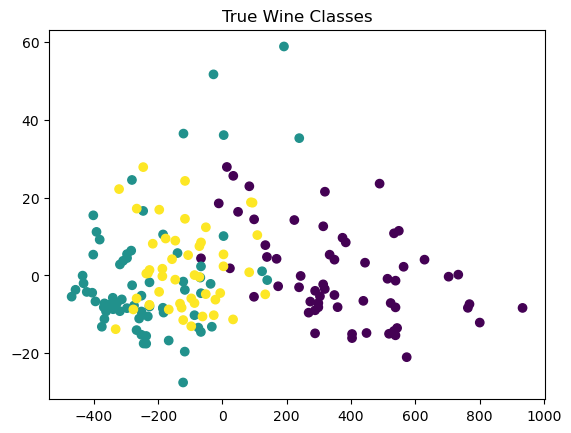

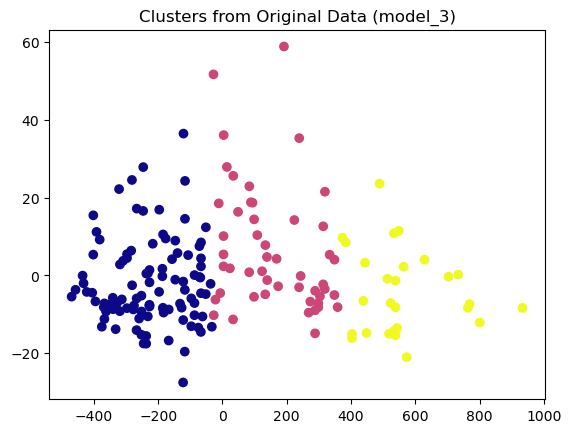

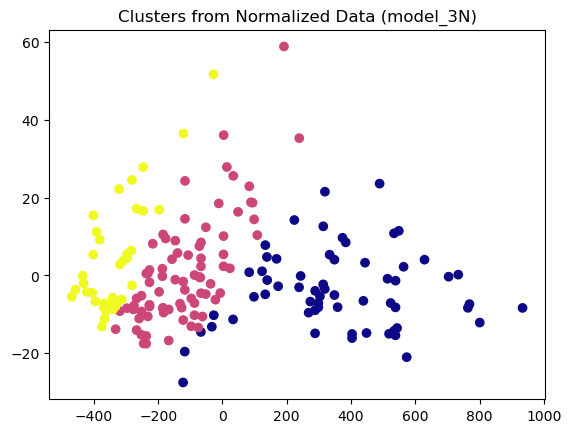

In [16]:
#Checking PCA plot
pca = PCA(n_components=2)
X_pca = pca.fit_transform(df)     

plt.scatter(X_pca[:,0], X_pca[:,1], c=Y, cmap="viridis")
plt.title("True Wine Classes")
plt.show()

#Scatter plot for original data
plt.scatter(X_pca[:,0], X_pca[:,1], c=labels_original, cmap="plasma")
plt.title("Clusters from Original Data (model_3)")
plt.show()

#Scatter plot for normalized data
plt.scatter(X_pca[:,0], X_pca[:,1], c=labels_norm, cmap="plasma")
plt.title("Clusters from Normalized Data (model_3N)")
plt.show()

**QUESTION 14**

From the confussion matrix we can see that the clustering from the original data preforms poorly, for only class 1 is reasonably well grouped and this is probably because, as seen on question 5, some variables such as proline, color intensity, and flavanoids have a very wide range of values. On the other hand, the clustering for normalized data is much better, as we can see, all the data from classes 0 and 2 are much better distributed despite values form class 1 being distributed mainly in two clusters. This shows that clustering normalized values helps obtainging much clearer and better results because the values of the features are all within a similar range.

Focusing now on the "True Wine Classes" plot, we can see that there are three distinct groups of data, which is a sign that the wines actually do naturally form 3 categories according to their chemical composition, two of them closer to each other than the third, but still 3 classes. What draws atention is the fact that the scatter plot with the original data does not resemble at all the first plot, having several blue dots taking what were originally yellow values. The only color which composition makes a little sense is the yellow one, bcause wide range features like proline have a tendeny to dominate PCA and k-means. The plot with the normalized data, however, resembles the original plot much better, with the blue cluster capturing most of the far-right group and the yellow and pink clusters dividing the left-side into two griups similary like the original plot. This behaviour proves, once more, that normalization improves the results because all features contribute equally to distance calculations, allowing k-means to detect structures that were hidden before with the original data.

All the results fom both the confusion matrixes and the plots prove that normalization is key when trying to create clusters to classify and understand the given data and trying to understand and learn from it.



In [17]:
# Crosstab for original data
ct_original = pd.crosstab(Y, model_3.labels_, rownames=['True Class'], colnames=['Cluster'])
print("Crosstab – Original Data:")
print(ct_original)

# Crosstab for normalized data
ct_norm = pd.crosstab(Y, model_3N.labels_, rownames=['True Class'], colnames=['Cluster'])
print("Crosstab – Normalized Data:")
print(ct_norm)

Crosstab – Original Data:
Cluster      0   1   2
True Class            
0            1  31  27
1           64   7   0
2           37  11   0
Crosstab – Normalized Data:
Cluster      0   1   2
True Class            
0           51   8   0
1            6  32  33
2            4  40   4


**QUESTION 15**

Seeing the crosstabs, we can see that in the original data one that Class 0 and Class 2 are spread across several clusters, but Class 1 is in one compact group. This confirms the results in question 14: without normalization, k-means is dominated by features with large scales like the oes seen in Question 5, which results in poorly separated clusters.

In the crosstab with the normalized data that the display is much more even and with the values distributed in a better manner. Class 0 and Class 1 are distributed in one big cluster each while Class 1 is splitted into two clusters. This last fact may indicate that either the features do not fully separate these classes or the clustering algorithm’s randomness is affecting the results. 

Theses results lead us to the conclusion that, while normalization plays a great part in obtaining the data infromation and patterns as seen in all the questions aswered above, the k-means algorithim can not arrange and filter the data correctly by itself.